In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Jesus Armando Cañas Gamboa

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [59]:
def Metodo_de_Jacobbi(A, b, tol= 1e-18, max_iter = 100000):
  ''' Este metodo resuelve un sitema de ecuaciones
  lineales usando el metodo de Jacobbi
  Entradas A matriz asociada al sistema (Array)
           b vector

  Salidas x solucion
  '''
  n = len(b) #Extraemos la dimension  de los arrays

  x = np.zeros(n, dtype=float) #Hacemos arrays vacios
  xnew = np.zeros(n, dtype=float)


  for k in range(max_iter): #Inicializamos el ciclo donde vamos a obtener el x


    for i in range(n): #Iteramos sobre la matriz para obtener cada valor de

      suma = 0 #Inicializamos la variable donde vamos a guardar el valor de la suma

      for j in range(n):
        if j != i :
          suma += A[i, j] * x[j]

      xnew[i] = (1 / A[i, i]) * (b[i] - suma)

    if np.linalg.norm(xnew - x) < tol:
      return xnew, k

    x = xnew.copy()


  raise ValueError('Maximo de iteraciones alcanzado')


In [60]:
A = np.array([[10, -1, 2, 0],
              [-2, 11, 0, -1],
              [3, -1, 10, -4],
              [0, 2, -1, 8]], dtype = float)
b = np.array([6, 25, -11, 15], dtype = float)

sol, k = Metodo_de_Jacobbi(A, b)
print(f'Solucion usando el metodo de Jacobbi: {sol}')
print(f'Solucion usando linalg solve: {np.linalg.solve(A, b)}')




ValueError: Maximo de iteraciones alcanzado

In [56]:
tolerancia = np.logspace(-18, -1, 18)
n = len(tolerancia)

error = np.zeros(n, dtype = float)
k = np.zeros(n, dtype = float)

for i in range(n):
  solJ, k[i] = Metodo_de_Jacobbi(A, b, tol = tolerancia[i])
  solL = np.linalg.solve(A,b)

  error[i] = abs(np.linalg.norm(solJ - solL))

  plt.plot(tolerancia, error)

ValueError: Maximo de iteraciones alcanzado

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


Text(0.5, 0, 't(s)')

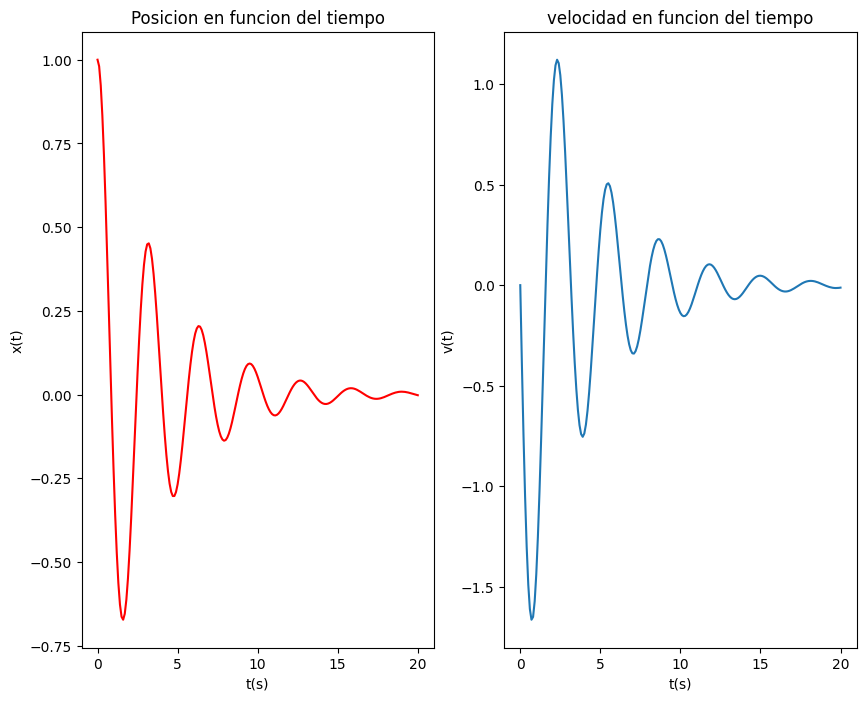

In [71]:
def Sistema_masa_resorte(t, Y, args):
  '''Esta funcion representa el sistema de ecuaciones de
  un sistema masa resorte amortiguado

  Entradas:
  t : tiempo(float)
  Y : array con las variables v y y
  args: array con las constantes

  Salidas:
  dY array con que representa el sistema de ecuaciones

  '''
  m, c, k = args #Costantes
  y, v = Y #Variables
  dY = np.zeros_like(Y) #Creamos el array con dY para ir indexando

  dY[0] = v #Reemplazamos lo que representa cada elemento de dY
  dY[1] = -(1/m) * (c*v + k*y)

  return dY #Retornamos

#Valores de las constantes y condiciones iniciales
m = 1 #kg
k = 4 #N/m
c = 0.5 # N * m/s

args = [m, c, k]
y0 = 1
v0 = 0

#Valores de tiempo
t0 = 0
tf = 20
h = 0.1

t = np.arange(0, 20+h, h)

#Usamos solveivp
sol = solve_ivp(lambda t, Y: Sistema_masa_resorte(t, Y, args),(t0, tf), [y0, v0], method = 'RK45', t_eval=t)

#Graficamos
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.title('Posicion en funcion del tiempo')
plt.plot(sol.t, sol.y[0], 'r-', )
plt.xlabel('t(s)')
plt.ylabel('x(t)')

plt.subplot(1,2,2)
plt.title('velocidad en funcion del tiempo')
plt.plot(sol.t, sol.y[1])
plt.ylabel('v(t)')
plt.xlabel('t(s)')

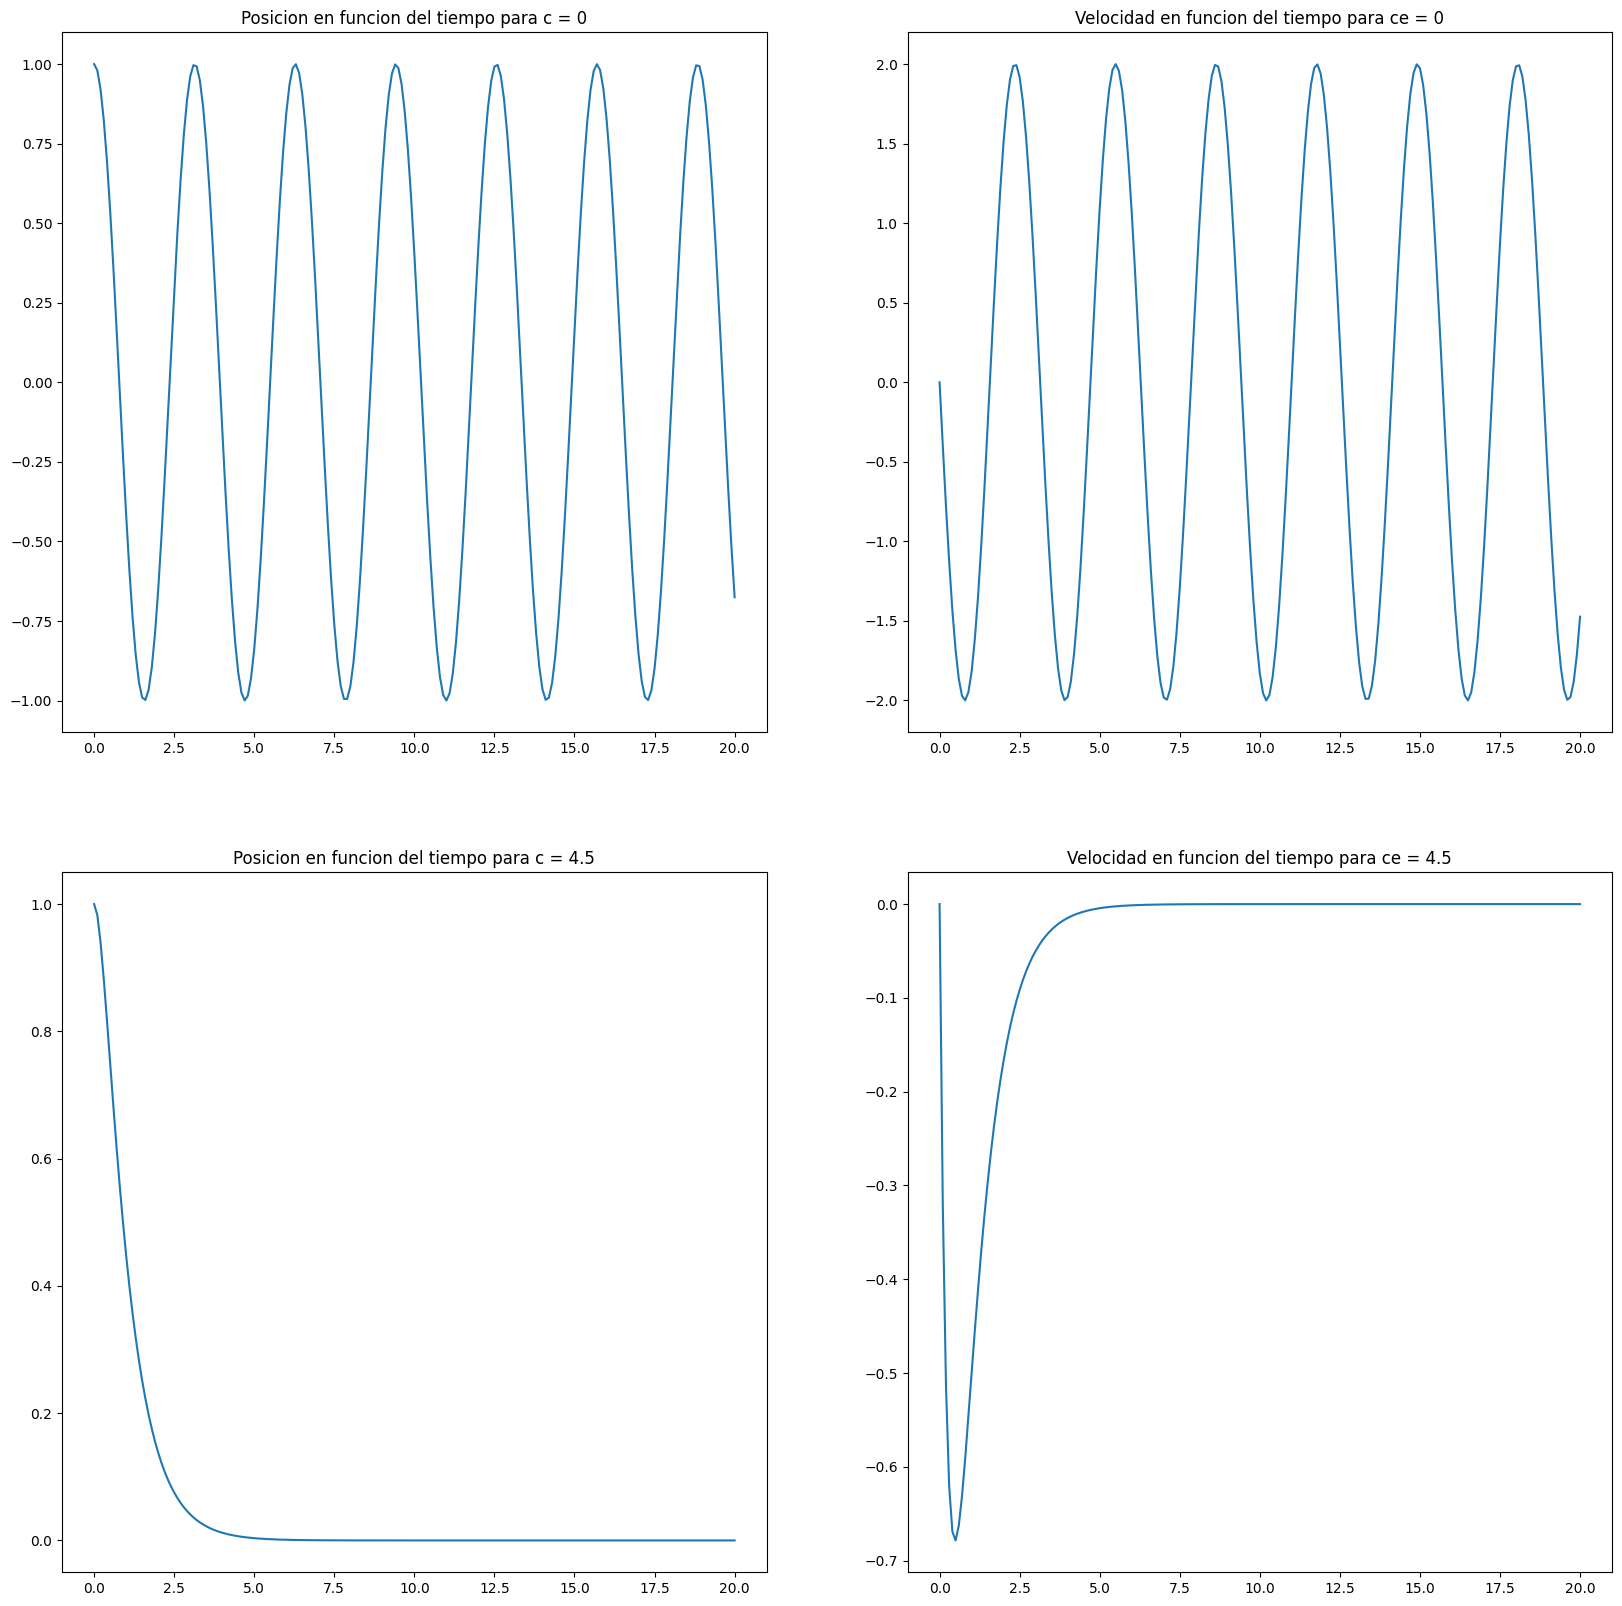

In [79]:
m = 1 #kg
k = 4 #N/m
cs = [0, 4.5] # N * m/s
i = 1

plt.figure(figsize=(20,20))
for c in cs:
  args = [m, c, k]
  y0 = 1
  v0 = 0

  t0 = 0
  tf = 20
  h = 0.1

  t = np.arange(0, 20+h, h)

  sol = solve_ivp(lambda t, Y: Sistema_masa_resorte(t, Y, args),(t0, tf), [y0, v0], method = 'RK45', t_eval=t)

  plt.subplot(2,2,i)
  plt.title(f'Posicion en funcion del tiempo para c = {c}')
  plt.plot(sol.t, sol.y[0])
  plt.subplot(2,2,i+1)
  plt.title(f'Velocidad en funcion del tiempo para ce = {c}')
  plt.plot(sol.t, sol.y[1])
  i+= 2

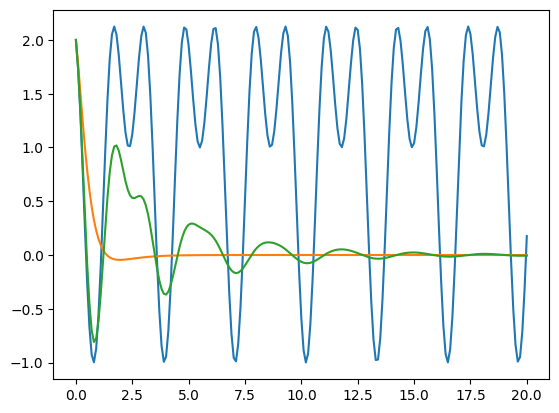

In [74]:
m = 1 #kg
k = 4 #N/m
cs = [0, 4.5, 0.5] # N * m/s

for c in cs:
  args = [m, c, k]
  y0 = 1
  v0 = 0

  t0 = 0
  tf = 20
  h = 0.1

  t = np.arange(0, 20+h, h)

  sol = solve_ivp(lambda t, Y: Sistema_masa_resorte(t, Y, args),(t0, tf), [y0, v0], method = 'RK45', t_eval=t)

  E = 0.5* m *sol.y[1] + 0.5 * k * sol.y[0]**2
  plt.title('Energia en funcion del tiempo')
  plt.plot(sol.t, E, label = f'solucion para c = {c}')
  plt.legend()


# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [72]:

n = 1000


for i  in range(n):
  A = np.random.rand(5,5) #Hacemos unam matriz 5x5


  vals = np.linalg.eigvals(A)
  detv = np.prod(vals)
  trazav = np.sum(vals)

  det = np.linalg.det(A)
  traza = np.trace(A)

  if (np.isclose(det, detv) == True) and (np.isclose(traza, trazav) == True):
      print('Ambas formas son equivalentes')


Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas formas son equivalentes
Ambas form

In [66]:
np.isclose?